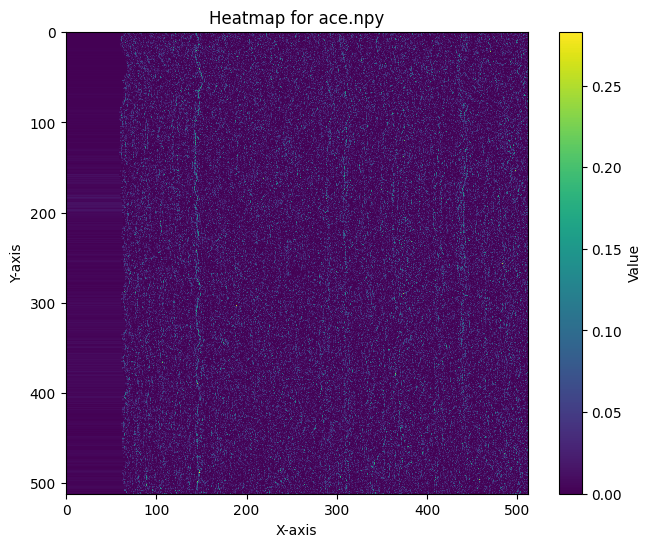

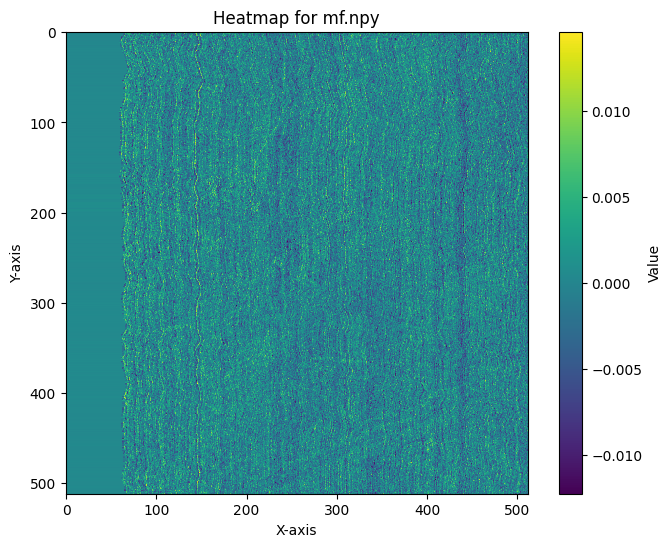

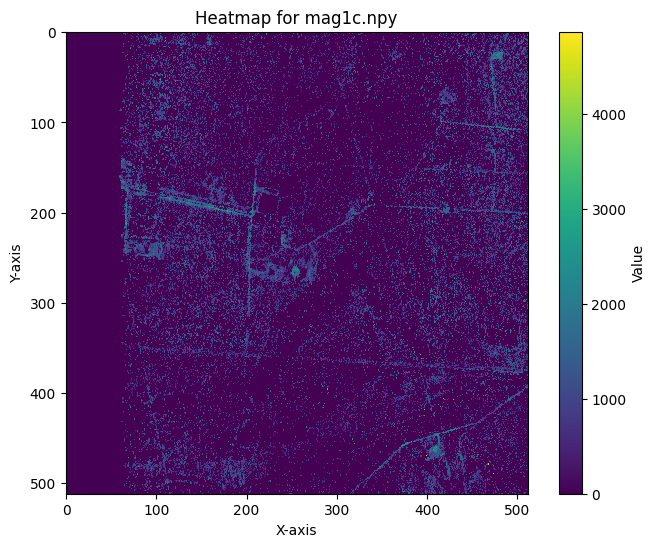

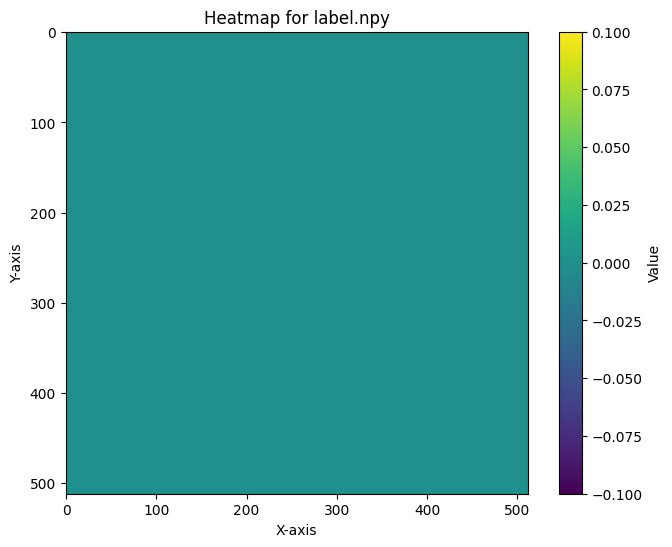

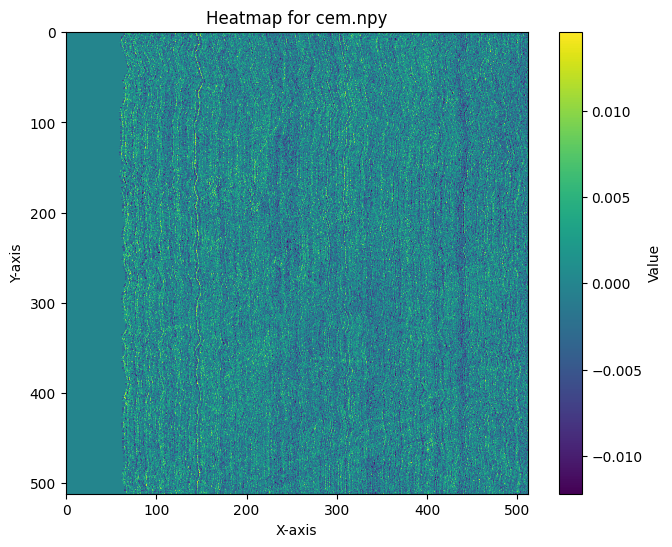

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Path to the folder containing the .npy files
path = "/home/jherec/methane-filters-benchmark/data/ang20191018t141549_r19200_c0_w512_h512"

# Loop through all files in the folder
for filename in os.listdir(path):
    # Check if the file is a .npy file
    if filename.endswith(".npy"):
        file_path = os.path.join(path, filename)
        
        # Load the 2D array from the .npy file
        data = np.load(file_path)
        
        # Create a new figure
        plt.figure(figsize=(8, 6))
        
        # Plot the 2D array as a heatmap
        plt.imshow(data, cmap='viridis', interpolation='nearest')
        plt.colorbar(label='Value')
        plt.title(f"Heatmap for {filename}")
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        
        # Show the plot
        plt.show()